# Libraries

In [39]:
# Standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os

# Preprocessing
pd.set_option('display.max_colwidth', None)  # Show full content of columns
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter



In [3]:
# dataset taken from "https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews"

# Download the dataset
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

# Dynamically identify the file without showing the local path
files = os.listdir(path)  # List all files in the dataset directory
csv_file = [f for f in files if f.endswith(".csv")][0]  # Find the CSV file
df = pd.read_csv(os.path.join(path, csv_file))

In [4]:
# Display the data
display(df.head())
display(df.info())
display(df.describe(include="all"))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


None

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
count,568454.000000,568454,568454,568428,568454.000000,568454.00000,568454.000000,5.684540e+05,568427,568454
unique,NaN,74258,256059,218415,NaN,NaN,NaN,NaN,295742,393579
top,NaN,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",NaN,NaN,NaN,NaN,Delicious!,"This review will make me sound really stupid, ..."
freq,NaN,913,448,451,NaN,NaN,NaN,NaN,2462,199
mean,284227.500000,NaN,NaN,NaN,1.743817,2.22881,4.183199,1.296257e+09,NaN,NaN
std,164098.679298,NaN,NaN,NaN,7.636513,8.28974,1.310436,4.804331e+07,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.00000,1.000000,9.393408e+08,NaN,NaN
25%,142114.250000,NaN,NaN,NaN,0.000000,0.00000,4.000000,1.271290e+09,NaN,NaN
50%,284227.500000,NaN,NaN,NaN,0.000000,1.00000,5.000000,1.311120e+09,NaN,NaN
75%,426340.750000,NaN,NaN,NaN,2.000000,2.00000,5.000000,1.332720e+09,NaN,NaN


# Data Cleaning

In [5]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [6]:
df = df.drop(columns = ['ProfileName', 'Id'])
df = df.dropna(subset=['Summary'])

# Verify the changes
print(df.info())  
print(f"Remaining rows: {df.shape[0]}")  # Check number of remaining rows

<class 'pandas.core.frame.DataFrame'>
Index: 568427 entries, 0 to 568453
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568427 non-null  object
 1   UserId                  568427 non-null  object
 2   HelpfulnessNumerator    568427 non-null  int64 
 3   HelpfulnessDenominator  568427 non-null  int64 
 4   Score                   568427 non-null  int64 
 5   Time                    568427 non-null  int64 
 6   Summary                 568427 non-null  object
 7   Text                    568427 non-null  object
dtypes: int64(4), object(4)
memory usage: 39.0+ MB
None
Remaining rows: 568427


In [7]:
df['Score'].unique()
# Score follows the usual convention of descending order, whereby 5 is the best and 1 is the worst score. Let's build a map

array([5, 1, 4, 2, 3])

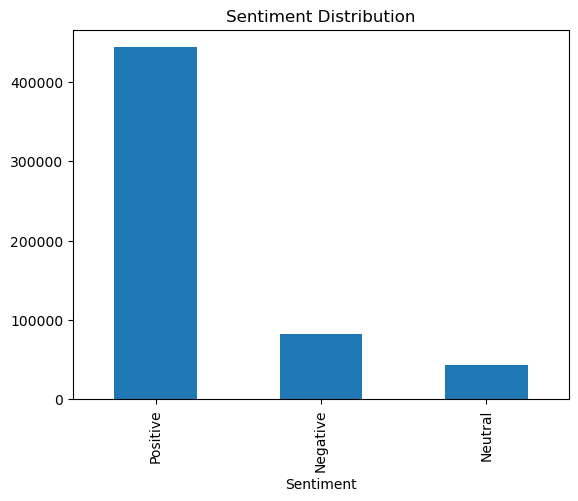

In [8]:
def map_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df['Sentiment'] = df['Score'].apply(map_sentiment)

import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()

# If the goal is classification, class imbalance must be dealt with, i.a. using Synthetic Minority Oversampling Technique from imblearn, undersampling, assign higher weights to minority classes
# class_weight = balanced, etc)

## Analysis column "Text"

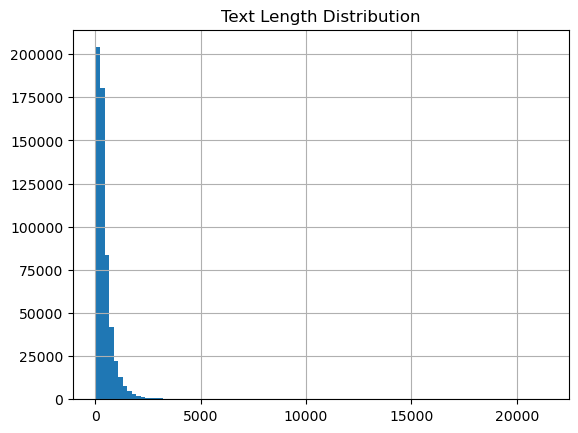

In [18]:
# Checking review lenght

df['Text_Length'] = df['Text'].apply(len) # using len, it will show character count on x-axis and frequency is represented in the y-axis

df['Text_Length'].hist(bins=100)
plt.title("Text Length Distribution")
plt.show()


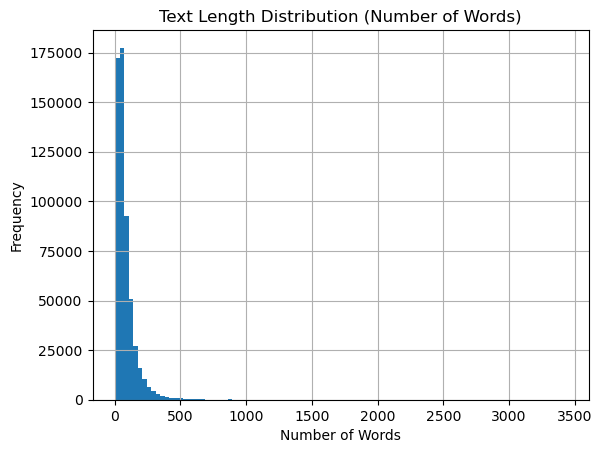

In [ ]:
# let's see it as number of words instead of carachters

df['Text_Length2'] = df['Text'].apply(lambda x: len(x.split()))

df['Text_Length2'].hist(bins=100) # range =(0,500)
plt.title("Text Length Distribution (Number of Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# The long tail of the distributions means the presence of outliers (small number of very long reviews)
# Let's study this 

In [30]:
print(df['Text_Length2'].describe()) # words
print("========================================")
print(df['Text_Length'].describe()) # carachters

count    568427.000000
mean         80.266458
std          79.456485
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: Text_Length2, dtype: float64
count    568427.000000
mean        436.236197
std         445.345607
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: Text_Length, dtype: float64


In [25]:
# let's look at the longest reviews to understand if the content is legit

long_reviews = df[df['Text_Length'] > 5000]['Text']

for review in long_reviews.head():
    print(review)
    print("\n" + "="*80 + "\n")  # Separator between reviews

# They seem to be legit reviews. I will leave them for now. 

I was getting VERY worried, when I read some of the other reviews here.  Specifically, the "One Star" reviews, to which I always go, to see if the faults these other reviewers find with any merchandise would prevent me from buying it.<br /><br />WOW!  They sure seemed to hate the KETTLE CHIPS, BACKYARD BARBECUE 9-OUNCE BAGS, (PACK OF 12), that I had bought as 1 ounce bags, liked A LOT, decided to subscribe....and then, for good measure, got 2 orders of the 9 ounce bags.<br /><br />Yes...I love potato chips....especially these KETTLE CHIPS, BACKYARD BARBECUE FLAVOUR....but others seemed to really HATE them...or at least, hate how they had changed.<br />But then I realized they were talking about OTHER FLAVOURS!  Amazon, in it's deep wisdom, has obviously seen fit to put ALL comments concerning ALL flavours of KETTLE, (and other brands of?????) potato chips, TOGETHER!<br /><br />Of course, this DOES have SOME advantages, because most potato-chip lovers, (like me!), enjoy eating several f

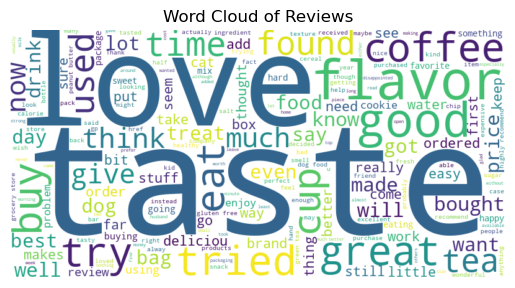

In [34]:
# Let'see the most frequently used words

all_text = " ".join(df['Text']) # combining all review text into one large string, separated by spaces

custom_stopwords = set(STOPWORDS).union({'br','product','Amazon','one','use','find', 'make'}) # Excluding words which are generic or irrelevant when analyzing text for insights.

wordcloud = WordCloud(width=800, height=400, background_color="white",stopwords=custom_stopwords).generate(all_text)

# Display

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

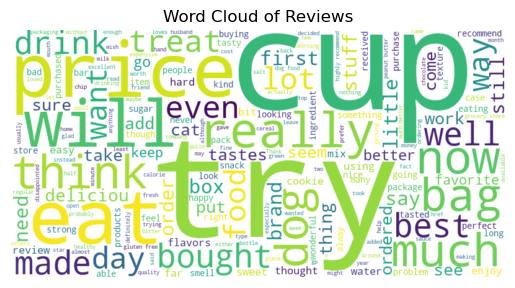

In [35]:
# Let's remove some other words

all_text = " ".join(df['Text']) # combining all review text into one large string, separated by spaces

custom_stopwords2 = set(STOPWORDS).union({
    "love", "great", "good", "used", "buy", "tried", "give", "got", 
    "makes", "taste", "flavor", "tea", "coffee", "time", "found", "know",
    'br','product','Amazon','one','use','find', 'make'
})

wordcloud = WordCloud(width=800, height=400, background_color="white",stopwords=custom_stopwords2).generate(all_text)

# Display

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

In [36]:
# Let's explore N-Grams (common two- or three-word phrases). They can reveal frequently mentioned product features, common issues or praise points in reviews, potential noise.

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
ngrams = vectorizer.fit_transform(df['Text'])
ngram_features = vectorizer.get_feature_names_out()
print(ngram_features[:10])  # Top 10 bi-grams


['00 00' '00 07' '00 09' '00 0z' '00 10' '00 100' '00 108' '00 10lb'
 '00 11' '00 12']


In [45]:
# Let's clean it

df['Cleaned_Text'] = df['Text'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove digits
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: re.sub(r'<.*?>', '', x))  # Remove HTML tags
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Keep only letters and spaces
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip().lower())  # Lowercase text and remove extra spaces
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: re.sub(r'(.)\1{2,}', r'\1', x))  # Replace repeated letters
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2])) # Remove words with less than 2 or 3 characters 


# Extend the stopwords list
custom_stopwords = list(set(STOPWORDS).union({"br", "carbs", "bit", "protein", "varieties", "don", "doing", "instead", "aa", "aaa"}))


# Apply CountVectorizer with custom stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=custom_stopwords)
ngrams = vectorizer.fit_transform(df['Cleaned_Text'])
ngram_features = vectorizer.get_feature_names_out()
print(ngram_features[:10])  # Top 10 bigrams


['aabout nostalgic' 'aabsolutely love' 'aachen munich' 'aachener printen'
 'aacurate happy' 'aacutebsolutely love' 'aad sausage' 'aadd good'
 'aadmit reading' 'aadults good']


<Axes: title={'center': 'Text_Length'}, xlabel='Sentiment'>

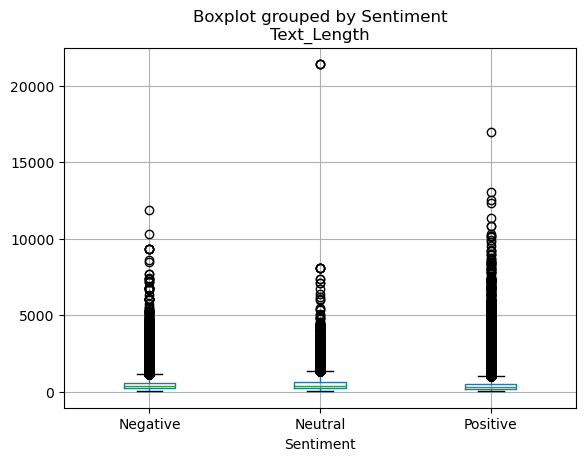

In [13]:
# Text length by sentiment
df.boxplot(column='Text_Length', by='Sentiment')

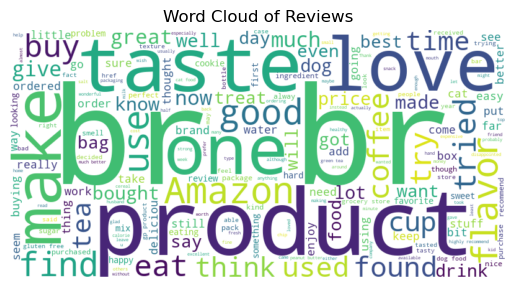

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()
